In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}table{margin-left: 0 !important;}</style>")

## Business Understanding

We aim to apply clustering to our crime dataset.  Specifically, we will use crime condition information to identify different patterns in terms of when crimes take place and what the weather conditions are. From these patterns, we will then generalize and explain the meaning behind the clusters we identify.  

### Measuring Effectiveness

We will use the Silhouette Coefficient (score) to determine cluster effectiveness.  The Silhouette score uses euclidean distance to determine if clusters are dense and well separated.  The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering.  Scores closer to 1 are better.

## Data Understanding

The following features are used in this clustering analysis:

|Feature | Description |
|:-------|:------------|
|Daytime | This specifies the general time of day a crime occurred.  i.e. Early Morning, Morning, Day, Evening, Late Evening, Night |
|Day_Name | The weekday name in which a crime occurred |
|Month | The month in which a crime occurred |
|Season | The season in which a crime occurred.  i.e. Winter, Spring, Summer, Fall |
|is_Holiday | Indicates if there was a holiday on the day in which a crime occurred (Boolean 1 = Holiday) |
|is_Event | Indicates if there was an event held in the city on the day a crime occurred (Boolean 1 = Event) |
|PRCP | The amount of precipitation in inches on the day a crime occurred |
|SNOW | The amount of snow in inches on the day a crime occurred |
|TMIN | The minimum temperature in Fahrenheit on the day a crime occurred |
|TMAX | The maximum temperature in Fahrenheit on the day a crime occurred |


With the fields above, we will be able to identify how the records in our dataset cluster and determine the mode of the string features and the average of the continuous features to arrive at a general description.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

### Pull in the Dataset

In [3]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_All_Crimes_Joined_All.csv"
#load Data into Pandas
df_Crime = pd.read_csv(file_path)

In [4]:
df_Crime.head(5)

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,count_cmplnt,...,SNOW,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event
0,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,15.0,BROOKLYN,1,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
1,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,16.0,BROOKLYN,4,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
2,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,25.0,BROOKLYN,7,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
3,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,26.0,BROOKLYN,2,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
4,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,34.0,BROOKLYN,1,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1


In [5]:
df_Crime.dtypes

CMPLNT_FR_DT           object
Daytime                object
Day_Name               object
Month                  object
Day                   float64
Year                  float64
Season                 object
GeoCell               float64
BORO_NM                object
count_cmplnt            int64
PRCP                  float64
SNOW                  float64
TMIN                    int64
TMAX                    int64
Population             object
PC_INCOME               int64
Hm_Sls_Price_Range     object
Holiday                object
Event                  object
is_Holiday              int64
is_Event                int64
dtype: object

### Data Processing

We label encode the categorical variables.   

|Feature |
|:-------|
|Daytime |
|Day_Name |
|Month |
|Season |


In [10]:
#label encode the categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

columns_to_encode = ['Daytime','Day_Name','Month','Season']
columns_no_change = ['is_Holiday','is_Event','PRCP','SNOW','TMIN','TMAX']

df_existing = df_Crime[columns_no_change]
df_encoded = df_Crime[columns_to_encode]

le = LabelEncoder()

df_Crime[columns_to_encode] = df_Crime[columns_to_encode].apply(le.fit_transform)
df_Crime = df_Crime[columns_to_encode+columns_no_change]

In [11]:
df_Crime.head(5)

,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,PRCP,SNOW,TMIN,TMAX
0,0,6,4,3,1,1,0.0,0.0,24,33
1,0,6,4,3,1,1,0.0,0.0,24,33
2,0,6,4,3,1,1,0.0,0.0,24,33
3,0,6,4,3,1,1,0.0,0.0,24,33
4,0,6,4,3,1,1,0.0,0.0,24,33



We scale the continuous variables so that we can better calculate distance when clustering.


|Feature |
|:-------|
|PRCP |
|SNOW |
|TMIN |
|TMAX |

In [12]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_scale = ['PRCP','SNOW','TMIN','TMAX']
#get a list of all columns without the columns to scale above
lstCols = df_Crime.columns.values.tolist()
lstCols.remove('PRCP')
lstCols.remove('SNOW')
lstCols.remove('TMIN')
lstCols.remove('TMAX')
columns_no_change = lstCols

df_existing = df_Crime[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(df_Crime[columns_to_scale])

#concatenate processed columns back together for X_train
X_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_np)
#get the column names back to the dataframe
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
df_Crime = df1

In [13]:
df_Crime.head()

,PRCP,SNOW,TMIN,TMAX,Daytime,Day_Name,Month,Season,is_Holiday,is_Event
0,-0.350032,-0.15313,-1.385995,-1.599525,0.0,6.0,4.0,3.0,1.0,1.0
1,-0.350032,-0.15313,-1.385995,-1.599525,0.0,6.0,4.0,3.0,1.0,1.0
2,-0.350032,-0.15313,-1.385995,-1.599525,0.0,6.0,4.0,3.0,1.0,1.0
3,-0.350032,-0.15313,-1.385995,-1.599525,0.0,6.0,4.0,3.0,1.0,1.0
4,-0.350032,-0.15313,-1.385995,-1.599525,0.0,6.0,4.0,3.0,1.0,1.0


### K-Mode Cluster Analysis

As an alternative clustering algorithm, we experiment with K-Mode KPrototypes.  The benefit of this method is that it is optimized to work with mixed data such as both continuous and categorical variables.

First we use a cost function to determine the optimal number of clusters.  Below, we can see that the optimal number of clusters is 3.

<function matplotlib.pyplot.show(close=None, block=None)>

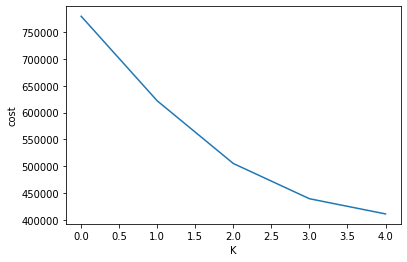

In [22]:
from kmodes.kprototypes import KPrototypes
#Choosing optimal K value
cost = []
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(df_Crime, categorical=[4,5,6,7,8,9])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

Next, we use the identified optimal clusters of 3 to fit a model.  You can see the fit function allows us to specify which variables should be treated as categorical.

In [23]:
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
clusters = kproto.fit_predict(df_Crime, categorical=[4,5,6,7,8,9])

## Measuring Effectiveness

Below, we calculate the silhouette score of our clusters.  The value closer to 1 between -1 and +1 indicates better clustering as measured by denseness and separability.  Here, we can see that the silhouette score is less than the score when performing clustering using kmeans.

In [90]:
from sklearn.metrics import silhouette_score
silhouette_score(df_Crime, clusters)

0.11674158928861209

###  Describing the Results

Now, we'll take our cluster labels and add them back to the original dataset so that we can begin to analyze the patterns that make up the different clusters.  This will allow us to describe what is different about the clusters.

In [28]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_All_Crimes_Joined_All.csv"
#load Data into Pandas
df = pd.read_csv(file_path)
df = df[columns_to_encode+columns_to_scale]
df['cluster_id']=clusters

In [31]:
df_Crime['cluster_id']=clusters

In [29]:
df.head(5)

,Daytime,Day_Name,Month,Season,PRCP,SNOW,TMIN,TMAX,cluster_id
0,Day,Wednesday,January,Winter,0.0,0.0,24,33,0
1,Day,Wednesday,January,Winter,0.0,0.0,24,33,0
2,Day,Wednesday,January,Winter,0.0,0.0,24,33,0
3,Day,Wednesday,January,Winter,0.0,0.0,24,33,0
4,Day,Wednesday,January,Winter,0.0,0.0,24,33,0


Pair plots with cluster color codes allow us to get a sense of how the clusters show separation.  We can se that there does appear to be a clear difference between clusters 2 and 0 in terms of temperature (TMIN and TMAX) as well as Months. Looking at the distribution of months, we can see a difference between clusters 1 and 2 as well.

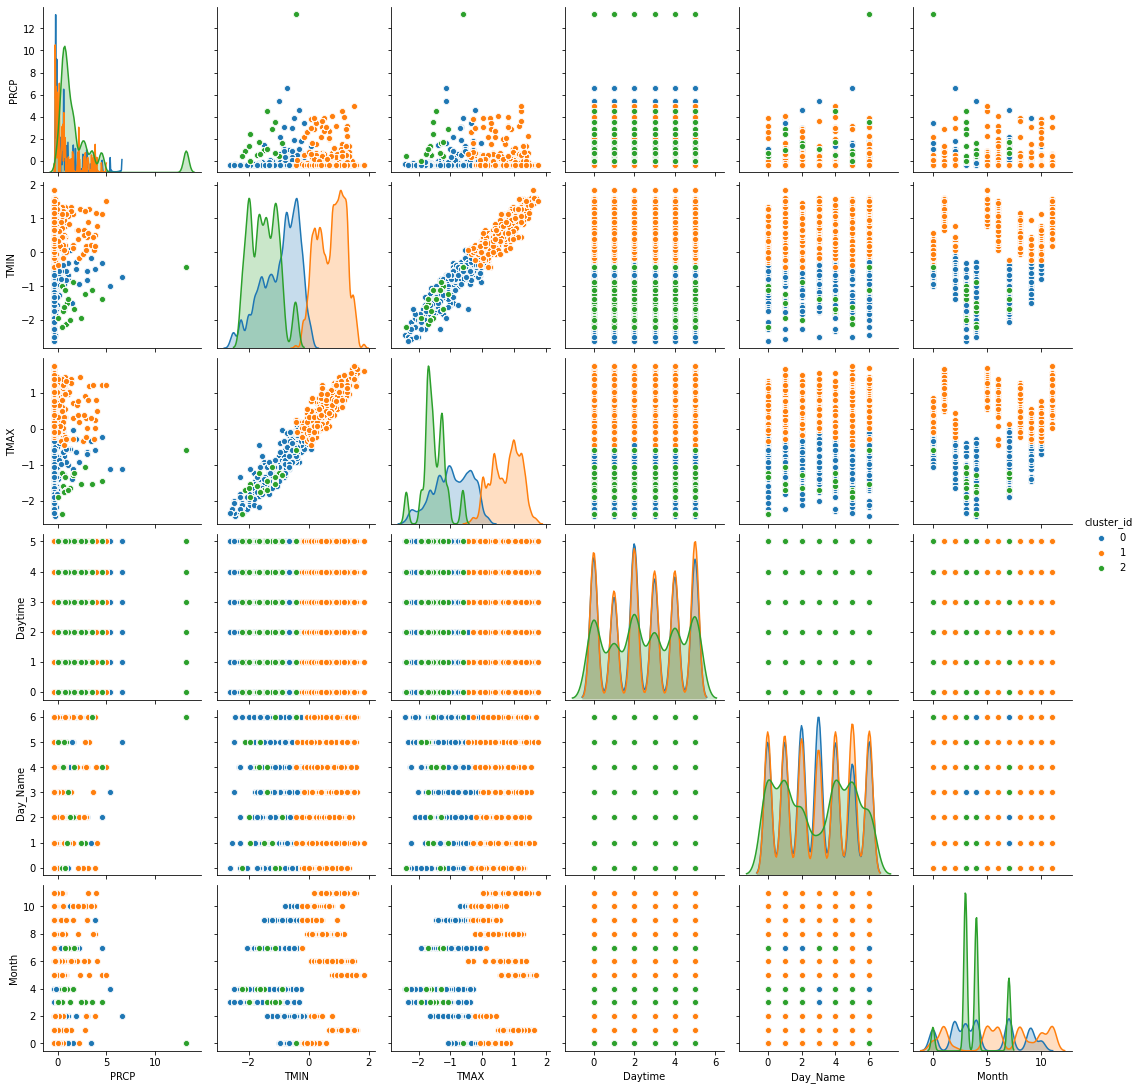

In [60]:
sns.pairplot(df_Crime[['PRCP','TMIN','TMAX','Daytime','Day_Name','Month','cluster_id']],hue='cluster_id')

In [69]:
df_Crime.reset_index(drop=True,inplace=True)
df.columns = [str(col) + '_x' for col in df.columns]
df_merged = pd.concat([df_Crime,df], axis=1)

In [72]:
df_merged.groupby(['cluster_id']).agg({"cluster_id":"count"})

,cluster_id
cluster_id,
0,78418
1,107115
2,4079


In [71]:
df_merged.groupby(['Month','Month_x','cluster_id']).agg({"cluster_id":"count"})

cluster_id
Month Month_x   cluster_id            
0.0   April     0                 9648
                1                 6399
                2                  243
1.0   August    1                16586
2.0   December  0                13252
                1                 2129
3.0   February  0                12101
                2                 1672
4.0   January   0                13837
                2                 1411
5.0   July      1                16541
6.0   June      0                   51
                1                15808
7.0   March     0                14772
                1                  201
                2                  753
8.0   May       1                16327
9.0   November  0                10390
                1                 4883
10.0  October   0                 4367
                1                11780
11.0  September 1                16461

In [73]:
df_Crime[df_Crime.cluster_id == 0].describe()

,PRCP,SNOW,TMIN,TMAX,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,cluster_id
count,78418.000000,78418.000000,78418.000000,78418.000000,78418.000000,78418.000000,78418.000000,78418.000000,78418.000000,78418.000000,78418.0
mean,-0.079853,-0.093193,-0.935818,-0.944412,2.512089,2.937055,4.578604,1.811982,0.034941,0.128950,0.0
std,0.814686,0.288575,0.616420,0.594670,1.726889,1.961166,3.078847,1.236353,0.183631,0.335147,0.0
min,-0.350032,-0.153130,-2.609748,-2.435497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-0.350032,-0.153130,-1.385995,-1.390532,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.0
50%,-0.350032,-0.153130,-0.774118,-0.920298,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.0
75%,-0.267915,-0.153130,-0.440367,-0.450063,4.000000,5.000000,7.000000,3.000000,0.000000,0.000000,0.0
max,6.602546,2.043379,0.115884,0.229164,5.000000,6.000000,10.000000,3.000000,1.000000,1.000000,0.0


In [89]:
df_merged[df_merged.cluster_id == 0].groupby(['Day_Name_x']).agg(clust_cnt=('cluster_id','count')).sort_values('clust_cnt')

,clust_cnt
Day_Name_x,
Tuesday,9154
Thursday,10856
Monday,10971
Friday,10995
Wednesday,11036
Saturday,12281
Sunday,13125


In [74]:
df_Crime[df_Crime.cluster_id == 1].describe()

,PRCP,SNOW,TMIN,TMAX,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,cluster_id
count,107115.000000,1.071150e+05,107115.000000,107115.000000,107115.000000,107115.000000,107115.000000,107115.000000,107115.000000,107115.000000,107115.0
mean,-0.024823,-1.531300e-01,0.741357,0.748780,2.557027,3.034132,6.285189,1.187359,0.022070,0.165159,1.0
std,0.866001,1.123551e-13,0.457860,0.453783,1.749850,2.023065,3.610579,0.900272,0.146911,0.371326,0.0
min,-0.350032,-1.531300e-01,-0.440367,-0.450063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,-0.350032,-1.531300e-01,0.338385,0.385909,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.0
50%,-0.350032,-1.531300e-01,0.783386,0.803895,3.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.0
75%,-0.240543,-1.531300e-01,1.117137,1.117385,4.000000,5.000000,10.000000,2.000000,0.000000,0.000000,1.0
max,4.987577,-1.531300e-01,1.840264,1.744364,5.000000,6.000000,11.000000,3.000000,1.000000,1.000000,1.0


In [88]:
df_merged[df_merged.cluster_id == 1].groupby(['Day_Name_x']).agg(clust_cnt=('cluster_id','count')).sort_values('clust_cnt')

,clust_cnt
Day_Name_x,
Sunday,13744
Saturday,14767
Monday,15284
Thursday,15526
Friday,15551
Wednesday,15632
Tuesday,16611


In [75]:
df_Crime[df_Crime.cluster_id == 2].describe()

,PRCP,SNOW,TMIN,TMAX,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,cluster_id
count,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.0,4079.000000,4079.0
mean,2.187014,5.812825,-1.477199,-1.506903,2.550135,2.865653,3.905614,2.511645,0.0,0.236578,2.0
std,3.018600,3.211674,0.473223,0.371736,1.747379,2.078427,1.736763,0.859302,0.0,0.425033,0.0
min,0.033181,-0.153130,-2.220372,-2.383249,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,2.0
25%,0.635373,3.873804,-1.942246,-1.704022,1.000000,1.000000,3.000000,3.000000,0.0,0.000000,2.0
50%,1.073330,5.094087,-1.497245,-1.547277,2.000000,3.000000,4.000000,3.000000,0.0,0.000000,2.0
75%,2.441948,6.558427,-1.107869,-1.286035,4.000000,5.000000,4.000000,3.000000,0.0,0.000000,2.0
max,13.254027,13.269984,-0.440367,-0.606808,5.000000,6.000000,7.000000,3.000000,0.0,1.000000,2.0


In [87]:
df_merged[df_merged.cluster_id == 2].groupby(['Day_Name_x']).agg(clust_cnt=('cluster_id','count')).sort_values('clust_cnt')

,clust_cnt
Day_Name_x,
Sunday,259
Wednesday,481
Saturday,496
Tuesday,691
Monday,703
Thursday,719
Friday,730


In [79]:
df_mode = df.groupby(['cluster_id_x']).apply(pd.DataFrame.mode).reset_index(drop=True).drop(df[['PRCP_x','SNOW_x','TMIN_x','TMAX_x']], axis=1)
df_mode

,Daytime_x,Day_Name_x,Month_x,Season_x,cluster_id_x
0,Evening,Sunday,March,Winter,0
1,Night,Tuesday,August,Summer,1
2,Evening,Friday,February,Winter,2


In [80]:
df_avg = df.groupby(['cluster_id_x']).agg(
            avg_PRCP=('PRCP_x','mean'),
            avg_Snow=('SNOW_x','mean'),
            avg_TMIN=('TMIN_x','mean'),
            avg_TMAX=('TMAX_x','mean')).reset_index(drop=True)
df_avg

,avg_PRCP,avg_Snow,avg_TMIN,avg_TMAX
0,0.098705,0.049118,32.093040,45.538461
1,0.118809,0.000000,62.244429,77.945124
2,0.926864,4.888992,22.360382,34.772738


In [81]:
df_explain = pd.concat([df_avg,df_mode],axis=1)
df_explain

,avg_PRCP,avg_Snow,avg_TMIN,avg_TMAX,Daytime_x,Day_Name_x,Month_x,Season_x,cluster_id_x
0,0.098705,0.049118,32.093040,45.538461,Evening,Sunday,March,Winter,0
1,0.118809,0.000000,62.244429,77.945124,Night,Tuesday,August,Summer,1
2,0.926864,4.888992,22.360382,34.772738,Evening,Friday,February,Winter,2


## Summary

Below, we have used the data analyzed above to give meaning to the clusters identified.  This was done by looking at the mode of categorical data and the average of our continuous data by cluster along with visual representations from the pair plots above.

All clusters appear to primarily occur in the evening/night.

|Cluster id |Cluster Name | Description|
|:--------|:--------|:------------|
|Cluster 0| Cold Weather No Precipitation | Occurs in colder winter months on weekend when there's little to no precipitation |
|Cluster 1 |Warm Weather No Precipitation | Occurs in warmer months in the middle of the week with little to no precipitation |
|Cluster 2 |Cold Weather With Precipitation | Occurs in colder winter months on Thursday & Friday when there's rain or snow |



### Comparing Models

|Algorithm |Pros | Cons|
|:--------|:--------|:------------|
|KMeans| Simple to implement| Works best with continuous data |
||Scales to large datasets |  |
||Great documentation | |
|KModes |Designed to work with mixed data | Not as easy to visualize clustering on a plot |
|||Relatively poor documentation compared to sklearn |